In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

from itertools import chain   
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import pyarrow.parquet as pq
#https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/

In [2]:
res_file_name='joined_df_stats_by_symbol_mt_oddlot_mt_roundlot_bbo.parquet/'  
res_dir=f's3://maystreetdata/analysis/'
res_file=f'{res_dir}{res_file_name}/'
df = pq.read_table(source=res_file).to_pandas()
df
#agg_pd = pd.read_parquet(res_file, engine='pyarrow')

,Product,Feed_mt_roundlot_bbo,f_mt_roundlot_bbo,is_trading_hours,hour_est,diff_exchange_timestamp_sum,bidask_timeweight_mt_oddlot_sum,bidask_timeweight_mt_roundlot_bbo_sum,percent_oddlot_is_top,bid_ask_tw_mt_oddlot,bid_ask_tw_mt_roundlot_bbo
0,A,CQS,cqs_pillar,False,15,1.414835e+13,410618941396.096283,495575861892.055970,0.001547,0.029022,0.035027
1,A,CQS,cqs_pillar,False,06,1.202721e+14,11181991343802.813596,1545905961783.038124,0.000000,0.092972,0.012853
2,A,CQS,cqs_pillar,False,08,2.985616e+16,174262722558514.417121,44737354413329.545386,0.000000,0.005837,0.001498
3,A,CQS,cqs_pillar,False,09,3.199350e+16,-735036489155761.609546,586202254673034.706752,0.001446,-0.022975,0.018323
4,A,CQS,cqs_pillar,False,05,2.553504e+13,1570449267782.757128,657233204655.227000,0.000000,0.061502,0.025738
...,...,...,...,...,...,...,...,...,...,...,...
192777,ZYXI,UQDF,uqdf_binary,True,13,8.109717e+14,47716527030749.640272,54836680560965.139883,0.001074,0.058839,0.067618
192778,ZYXI,UQDF,uqdf_binary,True,15,9.678819e+14,60688043383906.401486,67151422965463.105936,0.001280,0.062702,0.069380
192779,ZYXI,UQDF,uqdf_binary,True,09,2.264833e+16,258928808455568.822527,258253610578903.331116,0.001212,0.011433,0.011403
192780,ZYXI,UQDF,uqdf_binary,True,14,8.201393e+14,37917406362715.325861,44861225654053.025383,0.001015,0.046233,0.054700


In [50]:
cols_to_num=['diff_exchange_timestamp_sum','bidask_timeweight_mt_oddlot_sum','bidask_timeweight_mt_roundlot_bbo_sum','percent_oddlot_is_top','bid_ask_tw_mt_oddlot','bid_ask_tw_mt_roundlot_bbo']
for one_col in cols_to_num:
    df[one_col]=df[one_col].astype(float)
ol_rl_stats = df.groupby(['hour_est','is_trading_hours']).agg({'bid_ask_tw_mt_oddlot':['mean','count']
                                                               ,'bid_ask_tw_mt_roundlot_bbo':['mean','count']
                                                               ,'percent_oddlot_is_top':['mean','count']
                                                              })
ol_rl_stats.columns=['_'.join(col) for col in ol_rl_stats.columns.values]
#print(ol_rl_stats)
disp_df=pd.pivot_table(ol_rl_stats.query(f"is_trading_hours == True"), values=['bid_ask_tw_mt_oddlot_mean','bid_ask_tw_mt_roundlot_bbo_mean'], index=['hour_est'],
                    columns=[], aggfunc=np.mean)/100
disp_df.style.format({
    'bid_ask_tw_mt_oddlot_mean': '{:,.2%}'.format,
    'bid_ask_tw_mt_roundlot_bbo_mean': '{:,.2%}'.format,
})


,bid_ask_tw_mt_oddlot_mean,bid_ask_tw_mt_roundlot_bbo_mean
hour_est,,
09,1.93%,2.86%
10,0.19%,0.20%
11,1.43%,0.11%
12,0.31%,0.12%
13,0.12%,0.29%
14,0.12%,0.12%
15,0.52%,0.54%


In [53]:
disp_df.mean()

bid_ask_tw_mt_oddlot_mean          0.006612
bid_ask_tw_mt_roundlot_bbo_mean    0.006070
dtype: float64

In [58]:
res_file='s3://maystreetdata/analysis/ARKW_trades.parquet/'
arkw_pd = pq.read_table(source=res_file).to_pandas().set_index('ExchangeTimestamp').sort_index()
arkw_pd.columns

Index(['Feed', 'SequenceNumber', 'ProductSequenceNumber', 'Product', 'Price',
       'Quantity', 'OrderPriority', 'ReceiptTimestamp', 'NmsTimestamp',
       'SubMarketCenterParticipantTimestamp', 'MatchId', 'NetChange',
       'AggressorSide', 'TradeVolume', 'TradeCondition', 'SaleCondition',
       'SaleCondition2', 'SaleCondition3', 'SaleCondition4', 'Printable',
       'OrderReferenceNumber', 'LeavesQuantity', 'Side', 'AffectsOrderBook',
       'BookStatus', 'MarketParticipant', 'OrderPrice', 'OrderQuantity',
       'ExchangeReceiptTimestamp', 'ExchangeEngineReceiptTimestamp',
       'HighLowLast', 'NumberOfOrders', 'StopStock', 'SubMarketParticipant',
       'TradeThroughExemptIndicator', 'PrimaryListingParticipant', 'IsQuote',
       'TradeReferenceNumber', 'CrossType', 'MarketMechanism', 'TradingMode',
       'ExecutionAttribute', 'BidMpid', 'AskMpid', 'ExchangeSendTimestamp',
       'TransactionTimestamp', 'OutsidePriceLimits', 'ImpliedSource',
       'TradingStatus', 'Currency'

In [ ]:
arkw_pd.head(500000)

In [161]:
all_groups=agg_pd[['Feed_oddlot','f_oddlot','is_trading_hours','update_count_pctrank','hour_est']].drop_duplicates()
res_pd_array=[]
comp_type='mean'
for one_group in all_groups.iterrows():
    feed_oddlot = one_group[1]['Feed_oddlot']
    f_oddlot = one_group[1]['f_oddlot']
    is_trading_hours = one_group[1]['is_trading_hours']
    update_count_pctrank = one_group[1]['update_count_pctrank']
    hour_est = one_group[1]['hour_est']
    one_df = agg_pd.query(f"Feed_oddlot=='{feed_oddlot}' and f_oddlot=='{f_oddlot}' and is_trading_hours=={is_trading_hours}  and update_count_pctrank=={update_count_pctrank}  and hour_est=={hour_est} ")
    one_df_res=(((one_df[[f'bid_ask_oddlot_{comp_type}',f'bid_ask_round_lot_bbo_{comp_type}',f'bid_ask_round_lot_nbbo_{comp_type}']].mean()).to_frame()*100).round(2)).transpose()
    one_df_res['feed_oddlot']=feed_oddlot
    one_df_res['f_oddlot']=f_oddlot
    one_df_res['is_trading_hours']=(is_trading_hours==1)
    one_df_res['update_count_pctrank']=(update_count_pctrank)
    one_df_res['comp_type']=(comp_type)
    one_df_res['hour_est']=(hour_est)
    statistic, pvalue = stats.ttest_rel(one_df[f'bid_ask_oddlot_{comp_type}'], one_df[f'bid_ask_round_lot_bbo_{comp_type}'])
    lbl='odd_vs_roundBBO'
    one_df_res[f'statistic_{lbl}']=statistic/abs(statistic)
    one_df_res[f'pvalue_{lbl}']=round(pvalue,2)
    
    statistic, pvalue = stats.ttest_rel(one_df[f'bid_ask_oddlot_{comp_type}'], one_df[f'bid_ask_round_lot_nbbo_{comp_type}'])
    lbl='odd_vs_roundNBBO'
    one_df_res[f'statistic_{lbl}']=statistic/abs(statistic)
    one_df_res[f'pvalue_{lbl}']=round(pvalue,2)
    res_pd_array=res_pd_array+[one_df_res]

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [162]:

stats_pd=pd.concat(res_pd_array)
for one_col in ['feed_oddlot','f_oddlot','is_trading_hours']:
    label_encoder = LabelEncoder()
    label_encoder.fit(stats_pd[one_col])
    stats_pd[f'{one_col}_encoded']=label_encoder.transform(stats_pd[one_col])
    
#print(stats_pd.groupby(['is_trading_hours']).sum())
stats_disp=stats_pd.sort_values(['is_trading_hours','feed_oddlot','f_oddlot','update_count_pctrank']).drop(columns=['feed_oddlot_encoded','f_oddlot_encoded','is_trading_hours_encoded']).reset_index().drop(columns=['index'])
def above_zero(val):
  try:  
    color = 'green' if val > 0 else 'red'
  except:
    color = 'grey'
  return 'color: %s' % color


In [163]:
one_df

,Product,is_trading_hours,Feed_oddlot,f_oddlot,update_count_pctrank,hour_est,bid_ask_round_lot_bbo_median,bid_ask_round_lot_nbbo_median,bid_ask_oddlot_median,bid_ask_round_lot_bbo_mean,bid_ask_round_lot_nbbo_mean,bid_ask_oddlot_mean,oddlot_data_count_mean,oddlot_bbo_mean,oddlot_nbbo_mean,oddlot_bbo_median,oddlot_nbbo_median
1172485,SQQQ,1,XDPV2,xdp_nyse_integrated,1.0,15,0.000337,0.000258,0.00028,0.000337,0.000258,0.00028,251225.5,0,1,0,1


In [164]:
stats_disp.query('update_count_pctrank>=0.6').dropna().style.applymap(above_zero).set_precision(2)

In [165]:
stats_disp.query('update_count_pctrank==0').dropna().style.applymap(above_zero).set_precision(2)

In [166]:
stats_disp.query('update_count_pctrank>=0.3 and update_count_pctrank<=0.5').dropna().style.applymap(above_zero).set_precision(2)

In [167]:
stats_pd.groupby(['is_trading_hours']).sum()

,bid_ask_oddlot_mean,bid_ask_round_lot_bbo_mean,bid_ask_round_lot_nbbo_mean,update_count_pctrank,hour_est,statistic_odd_vs_roundBBO,pvalue_odd_vs_roundBBO,statistic_odd_vs_roundNBBO,pvalue_odd_vs_roundNBBO,feed_oddlot_encoded,f_oddlot_encoded,is_trading_hours_encoded
is_trading_hours,,,,,,,,,,,,
False,11331.66,14376.40,7609.91,223.0,5848,-133.0,43.19,111.0,38.35,1287,3112,0
True,4862.28,2833.03,761.06,210.0,5040,77.0,12.72,313.0,2.73,1204,2940,420


In [ ]:
spread_stats_pd=pd.pivot_table(stats_pd.round(2),values=['statistic_odd_vs_roundBBO','statistic_odd_vs_roundNBBO'],columns=['is_trading_hours','hour_est']
               ,index=['feed_oddlot','f_oddlot','update_count_pctrank'])
spread_stats_pd.to_csv(f'{res_dir}spread_stats_pivot_{comp_type}.csv')
spread_stats_pd.style.applymap(above_zero).set_precision(2)

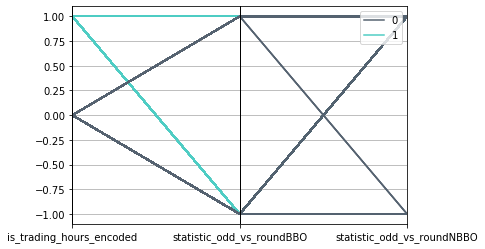

In [169]:
cols =['is_trading_hours','is_trading_hours_encoded','statistic_odd_vs_roundBBO','statistic_odd_vs_roundNBBO']
pd.plotting.parallel_coordinates(
    stats_pd[cols]*1, 'is_trading_hours', color=('#556270', '#4ECDC4', '#C7F464')
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

from itertools import chain   
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [3]:
spy_full_pd = pd.read_csv('s3://maystreetdata/analysis/spy_full.csv')
spy_full_pd=spy_full_pd.set_index('exchange_ts').sort_index()
spy_full_pd

,Unnamed: 0,Product_nbbo,SequenceNumber,Feed,SequenceNumber_nbbo,Side,BidQuantity_1,BidPrice_1,Price,AskPrice_1,AskQuantity_1,Quantity,SaleCondition,SaleCondition2,SaleCondition3,SaleCondition4
exchange_ts,,,,,,,,,,,,,,,,
1636035828600286047,0,NaN,1013832,NaN,NaN,NaN,NaN,NaN,466.6850,NaN,NaN,346.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829637667900,1,NaN,1013836,NaN,NaN,NaN,NaN,NaN,466.6650,NaN,NaN,346.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829680023339,2,NaN,1013837,NaN,NaN,NaN,NaN,NaN,466.6700,NaN,NaN,908.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829945058798,3,NaN,1013838,NaN,NaN,NaN,NaN,NaN,466.6650,NaN,NaN,200.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
1636035829993169791,4,NaN,1013839,NaN,NaN,NaN,NaN,NaN,466.6650,NaN,NaN,200.0,RegularTrade,NoSaleCondition,SoldOutOfSequence,NoSaleCondition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661558326310000000,4503635,NaN,1708379,NaN,NaN,NaN,NaN,NaN,403.9299,NaN,NaN,100.0,RegularTrade,NoSaleCondition,ExtendedHoursTradeOutOfSequence,NoSaleCondition
1661558339429000000,4503636,NaN,1708436,NaN,NaN,NaN,NaN,NaN,403.9299,NaN,NaN,100.0,RegularTrade,NoSaleCondition,ExtendedHoursTradeOutOfSequence,NoSaleCondition
1661558358191000000,4503637,NaN,1708583,NaN,NaN,NaN,NaN,NaN,403.9200,NaN,NaN,963.0,RegularTrade,NoSaleCondition,ExtendedHoursTradeOutOfSequence,NoSaleCondition


In [4]:
spy_full_pd['Bid']=spy_full_pd['BidPrice_1'].fillna(method='ffill')
spy_full_pd['Ask']=spy_full_pd['AskPrice_1'].fillna(method='ffill')
spy_full_pd=spy_full_pd#.fillna(method='ffill')
spy_full_pd['is_bid_trade']=(spy_full_pd['Price'] <= spy_full_pd['Bid'])*-1
spy_full_pd['is_ask_trade']=(spy_full_pd['Price'] >= spy_full_pd['Ask'])*1
spy_full_pd['is_invert']=((spy_full_pd['is_bid_trade']+spy_full_pd['is_ask_trade'])!=0)*1

spy_full_pd.query(f"((is_bid_trade==-1) or (is_ask_trade==1)) and is_invert==1").groupby(['is_bid_trade','is_ask_trade','is_invert']).count()

,,,Unnamed: 0,Product_nbbo,SequenceNumber,Feed,SequenceNumber_nbbo,Side,BidQuantity_1,BidPrice_1,Price,AskPrice_1,AskQuantity_1,Quantity,SaleCondition,SaleCondition2,SaleCondition3,SaleCondition4,Bid,Ask
is_bid_trade,is_ask_trade,is_invert,,,,,,,,,,,,,,,,,,
-1,0,1,1455143,933961,1455143,933961,933961,687779,933961,933961,1455143,933932,933932,1455143,1455143,1455143,1455143,1455143,1455143,1455143
0,1,1,1636875,1097607,1636875,1097607,1097607,353780,1097607,1097607,1636875,1097587,1097587,1636875,1636875,1636875,1636875,1636875,1636875,1636875


In [5]:
spy_full_pd['side_w_quantity']=spy_full_pd['Quantity']*spy_full_pd['is_bid_trade']+spy_full_pd['Quantity']*spy_full_pd['is_ask_trade']
spy_full_pd['vw_price']=spy_full_pd['Quantity']*spy_full_pd['Price']*(spy_full_pd['is_bid_trade']+spy_full_pd['is_ask_trade'])
spy_full_pd['vwap']=spy_full_pd['vw_price'].rolling(10000).sum()/spy_full_pd['Quantity'].rolling(10000).sum()

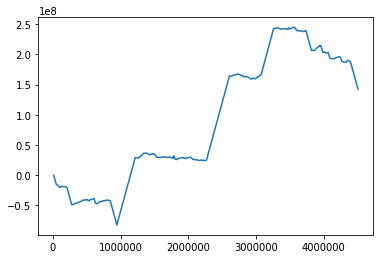

In [6]:
spy_full_pd['vwap'].cumsum().reset_index()['vwap'].plot()

In [10]:
spy_full_pd.groupby(['SaleCondition','SaleCondition2','SaleCondition3','SaleCondition4']).agg({'side_w_quantity':['count','sum']})

side_w_quantity  \
                                                                                                                count   
SaleCondition SaleCondition2                SaleCondition3                  SaleCondition4                              
CashTrade     NoSaleCondition               NoSaleCondition                 NoSaleCondition                         5   
                                                                            OddLotTrade                            26   
NextDayTrade  NoSaleCondition               NoSaleCondition                 NoSaleCondition                        15   
                                                                            OddLotTrade                           350   
RegularTrade  CorrectConsolidatedClosePrice NoSaleCondition                 NoSaleCondition                        15   
              DerivativelyPriced            NoSaleCondition                 AveragePriceTrade                    1387   
                                                                            NoSaleCondition                        35   
                                                                            OddLotTrade                          4638   
                                            SoldOutOfSequence               AveragePriceTrade                      23   
                                                                            OddLotTrade                            59   
              IntermarketSweepOrder         NoSaleCondition                 NoSaleCondition                    817553   
                                                                            OddLotTrade                        860731   
                                            SoldOutOfSequence               NoSaleCondition                         7   
                                                                            OddLotTrade                             1   
              MarketCenterClosingTrade      NoSaleCondition                 NoSaleCondition                    233341   
                                                                            OddLotTrade                        104226   
              MarketCenterOpeningTrade      NoSaleCondition                 CrossTrade                              4   
                                                                            NoSaleCondition                     80603   
                                                                            OddLotTrade                        637105   
              NoSaleCondition               ExtendedHoursTradeOutOfSequence AveragePriceTrade                       9   
                                                                            NoSaleCondition                       280   
                                                                            OddLotTrade                           579   
                                            NoSaleCondition                 AveragePriceTrade                      66   
                                                                            MarketCenterOfficialClose              25   
                                                                            MarketCenterOfficialOpen               10   
                                                                            NoSaleCondition                    833242   
                                                                            OddLotTrade                        906902   
                                            SoldOutOfSequence               NoSaleCondition                      6908   
                                                                            OddLotTrade                         13168   
              QualifiedContigentTrade       NoSaleCondition                 ContigentTrade                       1695   
                                                                            NoSaleCondition                  

In [1]:
auct_pd=pd.read_parquet('s3://maystreetdata/feeds_norm/mstnorm_parquet_0_5_0/mt=order_imbalance/f=total_view/dt=2022-08-24/1.parquet')

NameError: name 'pd' is not defined

In [2]:
auct_pd.query(f'Product=="AMZN"')

NameError: name 'auct_pd' is not defined